# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Loading the dataset

In [3]:
data= pd.read_csv('songs.csv')
data

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon) Justin ...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
96,1FSWSs9CL01RCYxXtm08Rf,Dance With Me Tonight Olly Murs,3.37,0.748,11,-5.922,0,0.0589,0.30500,0.000,0.0811,0.964,163.984,0.672
97,54bFM56PmE4YLRnqpW6Tha,Therefore I Am Billie Eilish,2.91,0.340,11,-7.773,0,0.0697,0.21800,0.130,0.0550,0.716,94.009,0.889
98,5jsw9uXEGuKyJzs0boZ1bT,Stitches Shawn Mendes,3.45,0.754,1,-6.684,1,0.0615,0.01510,0.000,0.0486,0.755,149.789,0.752


In [4]:
data.shape

(100, 14)

In [5]:
# remove all rows that contain at least one null value
data.isna().sum()

id                  0
name                0
duration            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
danceability        0
dtype: int64

# Exploring the dataset

In [6]:
data.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   duration          100 non-null    float64
 3   energy            100 non-null    float64
 4   key               100 non-null    int64  
 5   loudness          100 non-null    float64
 6   mode              100 non-null    int64  
 7   speechiness       100 non-null    float64
 8   acousticness      100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  valence           100 non-null    float64
 12  tempo             100 non-null    float64
 13  danceability      100 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.1+ KB


In [8]:
data.describe()

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.404900,0.587650,5.05000,-6.577120,0.560000,0.075461,0.314539,0.070682,0.161737,0.517354,121.548260,0.647900
std,0.927022,0.168273,3.82542,2.447338,0.498888,0.068065,0.281076,0.221947,0.112657,0.237512,29.148613,0.126942
min,0.730000,0.157000,0.00000,-14.067000,0.000000,0.025300,0.000280,0.000000,0.034100,0.059200,71.884000,0.352000
25%,2.910000,0.477750,1.00000,-7.676250,0.000000,0.036100,0.090750,0.000000,0.088375,0.329000,97.476250,0.566750
50%,3.370000,0.609000,5.00000,-6.262500,1.000000,0.051800,0.238500,0.000000,0.120000,0.542000,117.037500,0.663500
75%,3.630000,0.707750,8.00000,-4.786750,1.000000,0.080650,0.519750,0.000083,0.205250,0.711500,141.733750,0.734000
max,10.220000,0.883000,11.00000,-2.724000,1.000000,0.368000,0.941000,0.941000,0.509000,0.967000,180.917000,0.910000


# Data Clening

In [9]:
data.drop('id', axis='columns', inplace=True)  # drop id column
data.dropna(inplace=True)  # drop missing values

In [10]:
data.drop(['name'], axis='columns')

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
96,3.37,0.748,11,-5.922,0,0.0589,0.30500,0.000,0.0811,0.964,163.984,0.672
97,2.91,0.340,11,-7.773,0,0.0697,0.21800,0.130,0.0550,0.716,94.009,0.889
98,3.45,0.754,1,-6.684,1,0.0615,0.01510,0.000,0.0486,0.755,149.789,0.752


In [11]:
# Drop missing values
data.dropna()

,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Peaches (feat. Daniel Caesar & Giveon) Justin ...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
96,Dance With Me Tonight Olly Murs,3.37,0.748,11,-5.922,0,0.0589,0.30500,0.000,0.0811,0.964,163.984,0.672
97,Therefore I Am Billie Eilish,2.91,0.340,11,-7.773,0,0.0697,0.21800,0.130,0.0550,0.716,94.009,0.889
98,Stitches Shawn Mendes,3.45,0.754,1,-6.684,1,0.0615,0.01510,0.000,0.0486,0.755,149.789,0.752


In [12]:
# Drop all rows with NaN values
data.dropna(inplace=True)

In [13]:
# Check for duplicates
print(data.duplicated().sum())

10


In [14]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Data visualization

<AxesSubplot: xlabel='energy', ylabel='danceability'>

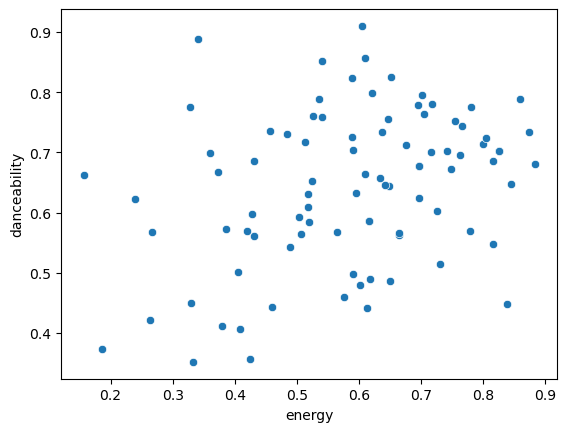

In [15]:
sns.scatterplot(x=data['energy'], y=data['danceability'])


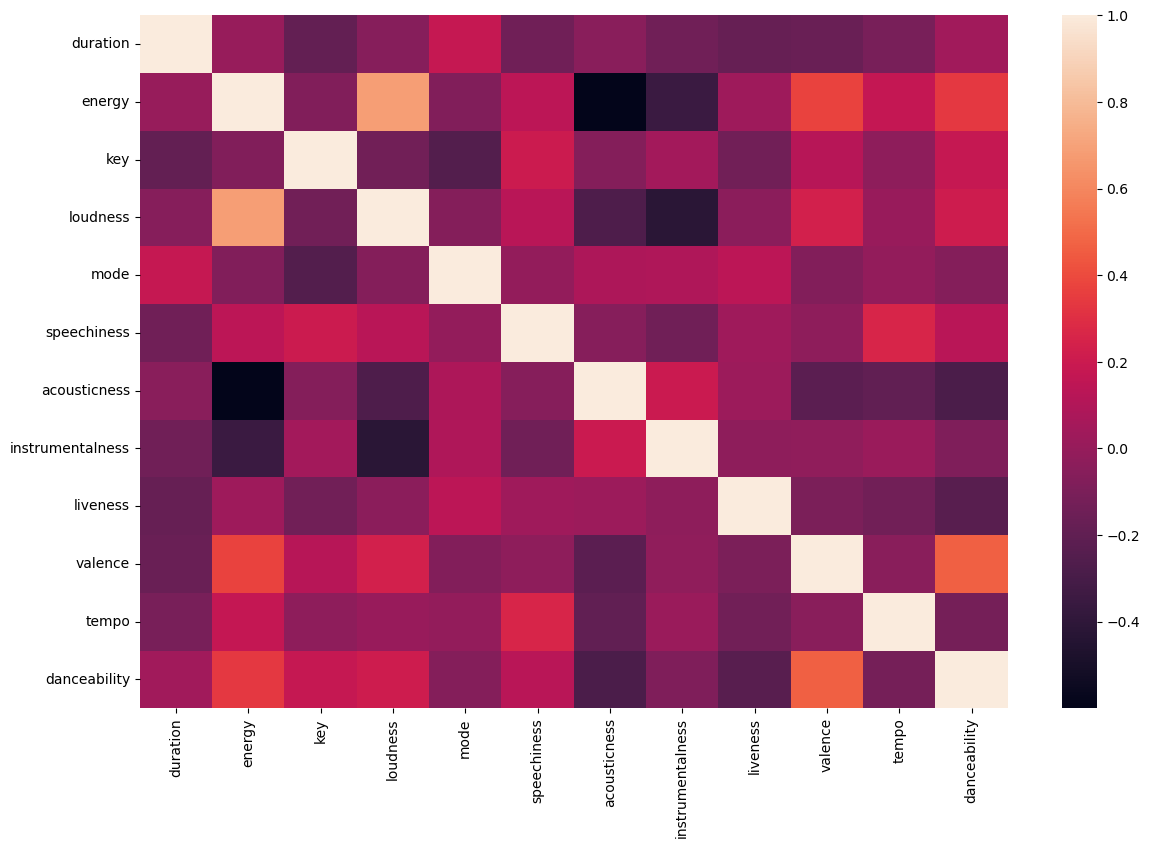

In [16]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix)
plt.show()

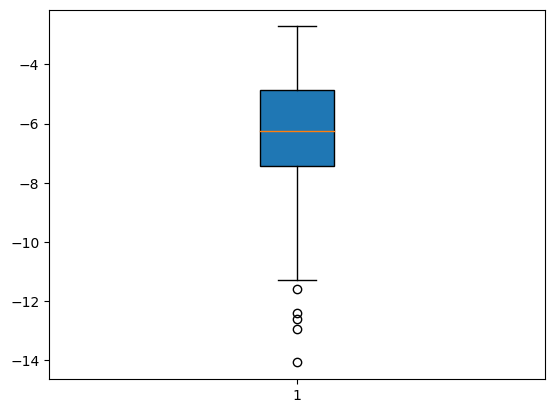

In [17]:
loudness = data['loudness']
plt.boxplot(loudness, vert= True, patch_artist='green')
plt.rcParams['figure.figsize']=(10,10)

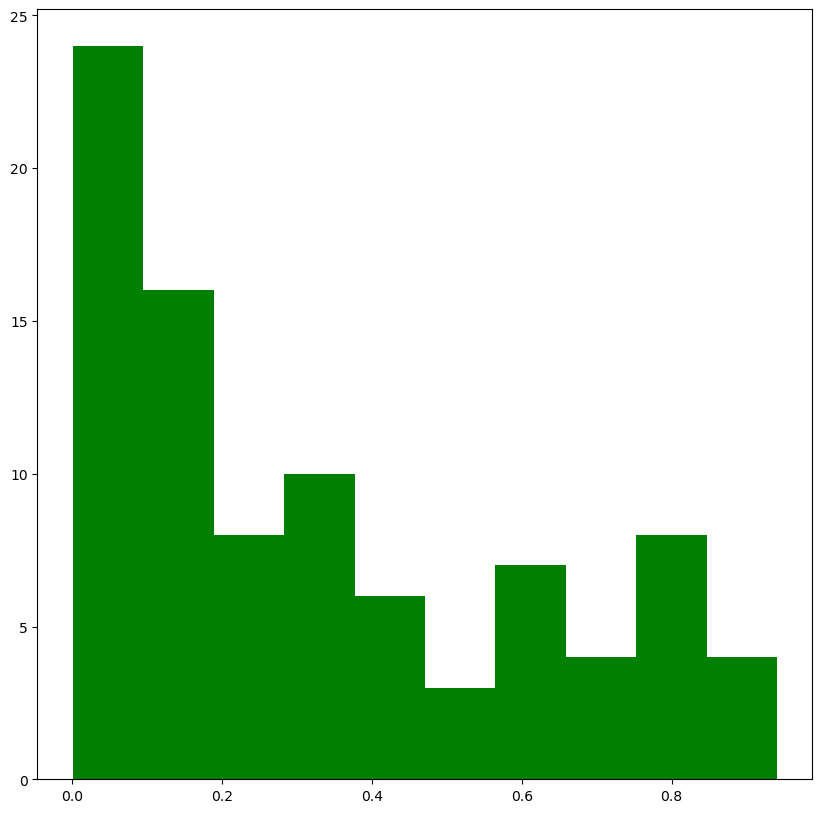

In [18]:
acoust = data['acousticness']
plt.hist(acoust,color='green')
plt.rcParams['figure.figsize']=(8,4)


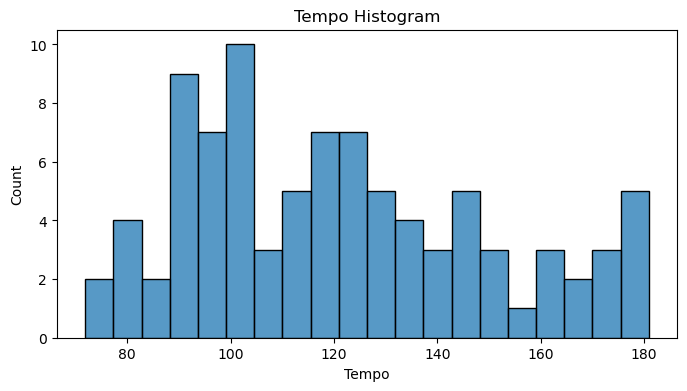

In [19]:
sns.histplot(data['tempo'], bins=20)
plt.title('Tempo Histogram')
plt.xlabel('Tempo')
plt.show()

C:\Users\Zihad Laptop\AppData\Local\Temp\ipykernel_6180\2099663958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['loudness'],color='green')


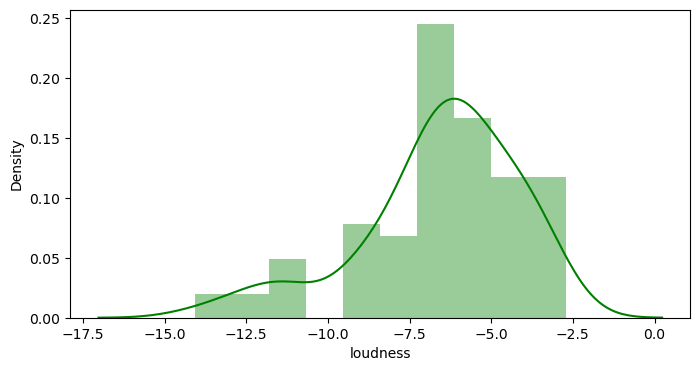

In [20]:
sns.distplot(data['loudness'],color='green')
plt.rcParams['figure.figsize']=(10,8)

C:\Users\Zihad Laptop\AppData\Local\Temp\ipykernel_6180\1654457043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['danceability'],color='red')


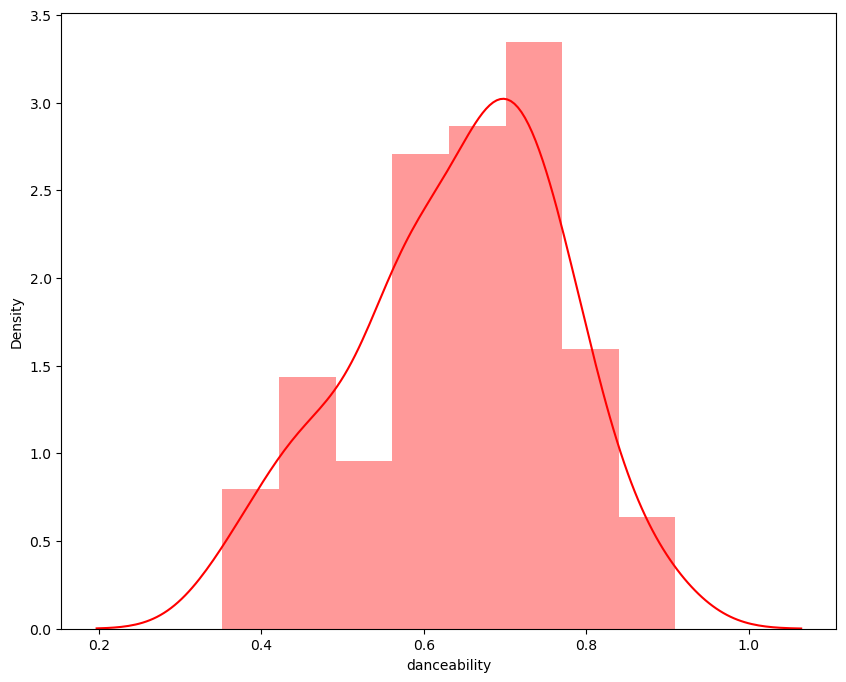

In [21]:
sns.distplot(data['danceability'],color='red')
plt.rcParams['figure.figsize']=(10,4)

# Linear Regression 

In [22]:
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

# One Hot Encoding

In [23]:
ohe = OneHotEncoder()
key_ohe = ohe.fit_transform(data[['key']]) # To perform one hot encoding on the 'key' column
key_ohe_df = pd.DataFrame(key_ohe.toarray(), columns=ohe.get_feature_names(['key']))
data = pd.concat([data, key_ohe_df], axis=1) # To add the encoded columns to the dataset

C:\Users\Zihad Laptop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Replace

In [24]:
data = data.replace({'mode': {0: 'Minor', 1: 'Major'}})
data

,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,27.0,2.97,0.664,9.0,-5.044,Major,0.1540,0.33500,0.000,0.0849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,67.0,2.30,0.506,8.0,-11.275,Major,0.0589,0.37900,0.868,0.1100,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,44.0,3.38,0.825,6.0,-3.787,Minor,0.0601,0.00883,0.000,0.0674,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,55.0,3.30,0.696,0.0,-6.181,Major,0.1190,0.32100,0.000,0.4200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.0,2.30,0.503,8.0,-6.725,Minor,0.2200,0.29300,0.000,0.4050,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Replace null values with a numeric value

In [25]:
data.fillna(value=0, inplace=True)

In [26]:
# Drop non-numeric columns
X = data.drop(['key', 'loudness', 'mode', 'acousticness'], axis=1)

In [27]:
y = data['duration']

# Train-Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy and Error

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Root Mean Squared Error:', rmse)
print('R-squared Score:', r2)

Root Mean Squared Error: 6.936895214610187e-15
R-squared Score: 1.0


# Visualize Output

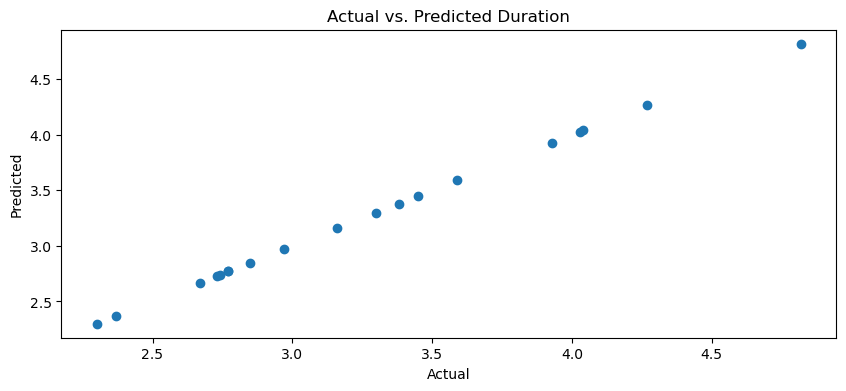

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Duration')
plt.show()